In [1]:
# Import necesssary lib
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import warnings
warnings.filterwarnings("ignore")
import itertools
import graphviz
import pydotplus

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
#Import Customer Dataset
data = pd.read_excel('KPMG_Model_Data.xlsx', sheet_name = 'CustomerDemographic')
data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,Postcode
0,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1,21,324,NSW,10.0,2217.0
1,1888,Sibyl,Scholtz,F,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1,21,123,NSW,10.0,2042.0
2,3435,Stevena,Allcock,F,80,2002-01-15,Senior Editor,Null,Affluent Customer,N,No,1,21,122,QLD,3.0,4301.0
3,2858,Benedicto,Radki,M,4,2002-01-09,Recruiting Manager,Null,Mass Customer,N,Yes,1,21,124,NSW,10.0,2044.0
4,422,Vito,Norker,M,78,2002-01-06,Null,Manufacturing,Affluent Customer,N,No,1,21,122,NSW,11.0,2031.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3415 non-null   int64         
 1   first_name                           3415 non-null   object        
 2   last_name                            3306 non-null   object        
 3   gender                               3415 non-null   object        
 4   past_3_years_bike_related_purchases  3415 non-null   int64         
 5   DOB                                  3415 non-null   datetime64[ns]
 6   job_title                            3415 non-null   object        
 7   job_industry_category                3415 non-null   object        
 8   wealth_segment                       3415 non-null   object        
 9   deceased_indicator                   3415 non-null   object        
 10  owns_car    

## DATA CLEANING

In [4]:
df = data.copy()

In [5]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,Postcode
0,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1,21,324,NSW,10.0,2217.0
1,1888,Sibyl,Scholtz,F,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1,21,123,NSW,10.0,2042.0
2,3435,Stevena,Allcock,F,80,2002-01-15,Senior Editor,Null,Affluent Customer,N,No,1,21,122,QLD,3.0,4301.0
3,2858,Benedicto,Radki,M,4,2002-01-09,Recruiting Manager,Null,Mass Customer,N,Yes,1,21,124,NSW,10.0,2044.0
4,422,Vito,Norker,M,78,2002-01-06,Null,Manufacturing,Affluent Customer,N,No,1,21,122,NSW,11.0,2031.0


In [6]:
df=df.drop(columns=['customer_id','first_name','last_name','DOB','Postcode'],axis=1)
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation
0,M,46,Account Executive,Argiculture,High Net Worth,N,No,1,21,324,NSW,10.0
1,F,67,Food Chemist,Health,Mass Customer,N,Yes,1,21,123,NSW,10.0
2,F,80,Senior Editor,Null,Affluent Customer,N,No,1,21,122,QLD,3.0
3,M,4,Recruiting Manager,Null,Mass Customer,N,Yes,1,21,124,NSW,10.0
4,M,78,Null,Manufacturing,Affluent Customer,N,No,1,21,122,NSW,11.0


In [7]:
df.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
RFM_VALUE                              0
State                                  4
Property_Valuation                     4
dtype: int64

In [8]:
df[df['State'].isnull()]

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation
390,M,43,Null,Null,High Net Worth,N,Yes,1,28,444,NaN,NaN
751,F,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,34,334,NaN,NaN
2898,F,79,Null,IT,Mass Customer,N,No,11,60,144,NaN,NaN
3388,M,61,Recruiting Manager,Property,Mass Customer,N,Yes,15,69,143,NaN,NaN


In [9]:
def impute_nan(df,variable):
    most_freq_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_category,inplace = True)

In [10]:
for feature in ['State','Property_Valuation']:
    impute_nan(df,feature)

In [11]:
df.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
RFM_VALUE                              0
State                                  0
Property_Valuation                     0
dtype: int64

In [12]:
df.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'RFM_VALUE', 'State',
       'Property_Valuation'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3415 non-null   object 
 1   past_3_years_bike_related_purchases  3415 non-null   int64  
 2   job_title                            3415 non-null   object 
 3   job_industry_category                3415 non-null   object 
 4   wealth_segment                       3415 non-null   object 
 5   deceased_indicator                   3415 non-null   object 
 6   owns_car                             3415 non-null   object 
 7   tenure                               3415 non-null   int64  
 8   Age                                  3415 non-null   int64  
 9   RFM_VALUE                            3415 non-null   int64  
 10  State                                3415 non-null   object 
 11  Property_Valuation            

In [14]:
df['Property_Valuation']=df['Property_Valuation'].astype(int)

In [15]:
job= df['job_title'].value_counts()
job.head(10)

Null                                    417
Business Systems Development Analyst     38
Social Worker                            36
Tax Accountant                           36
Internal Auditor                         35
Legal Assistant                          35
Associate Professor                      35
Executive Secretary                      34
Structural Engineer                      34
General Manager                          34
Name: job_title, dtype: int64

In [16]:
def removetitle(value):
    if value not in ['Null','Business Systems Development Analyst','Social Worker','Tax Accountant',
                     'Internal Auditor','Legal Assistant','Associate Professor','Executive Secretary',
                     'Structural Engineer','General Manager']:
        return 'Others'
    else:
        return value

df['job_title']=df['job_title'].apply(removetitle)
df['job_title'].value_counts()

Others                                  2681
Null                                     417
Business Systems Development Analyst      38
Tax Accountant                            36
Social Worker                             36
Internal Auditor                          35
Associate Professor                       35
Legal Assistant                           35
General Manager                           34
Structural Engineer                       34
Executive Secretary                       34
Name: job_title, dtype: int64

## EXPLORATORY DATA ANALYSIS

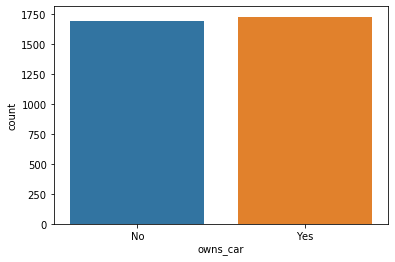

In [17]:
sns.countplot(df['owns_car'])

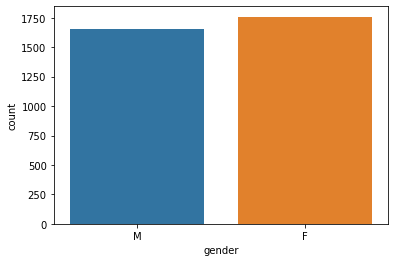

In [18]:
sns.countplot(df['gender'])

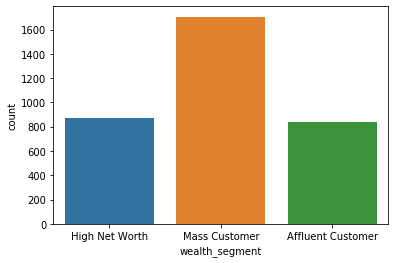

In [19]:
sns.countplot(df['wealth_segment'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

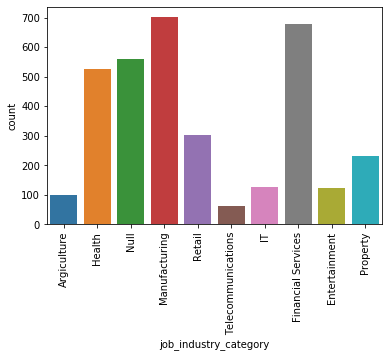

In [20]:
sns.countplot(df['job_industry_category'])
plt.xticks(rotation=90)

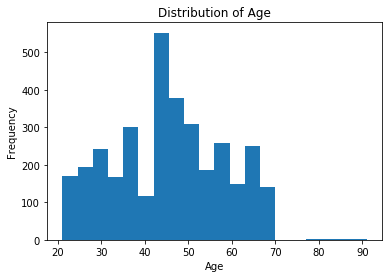

In [21]:
# Plot histogram of salaries
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


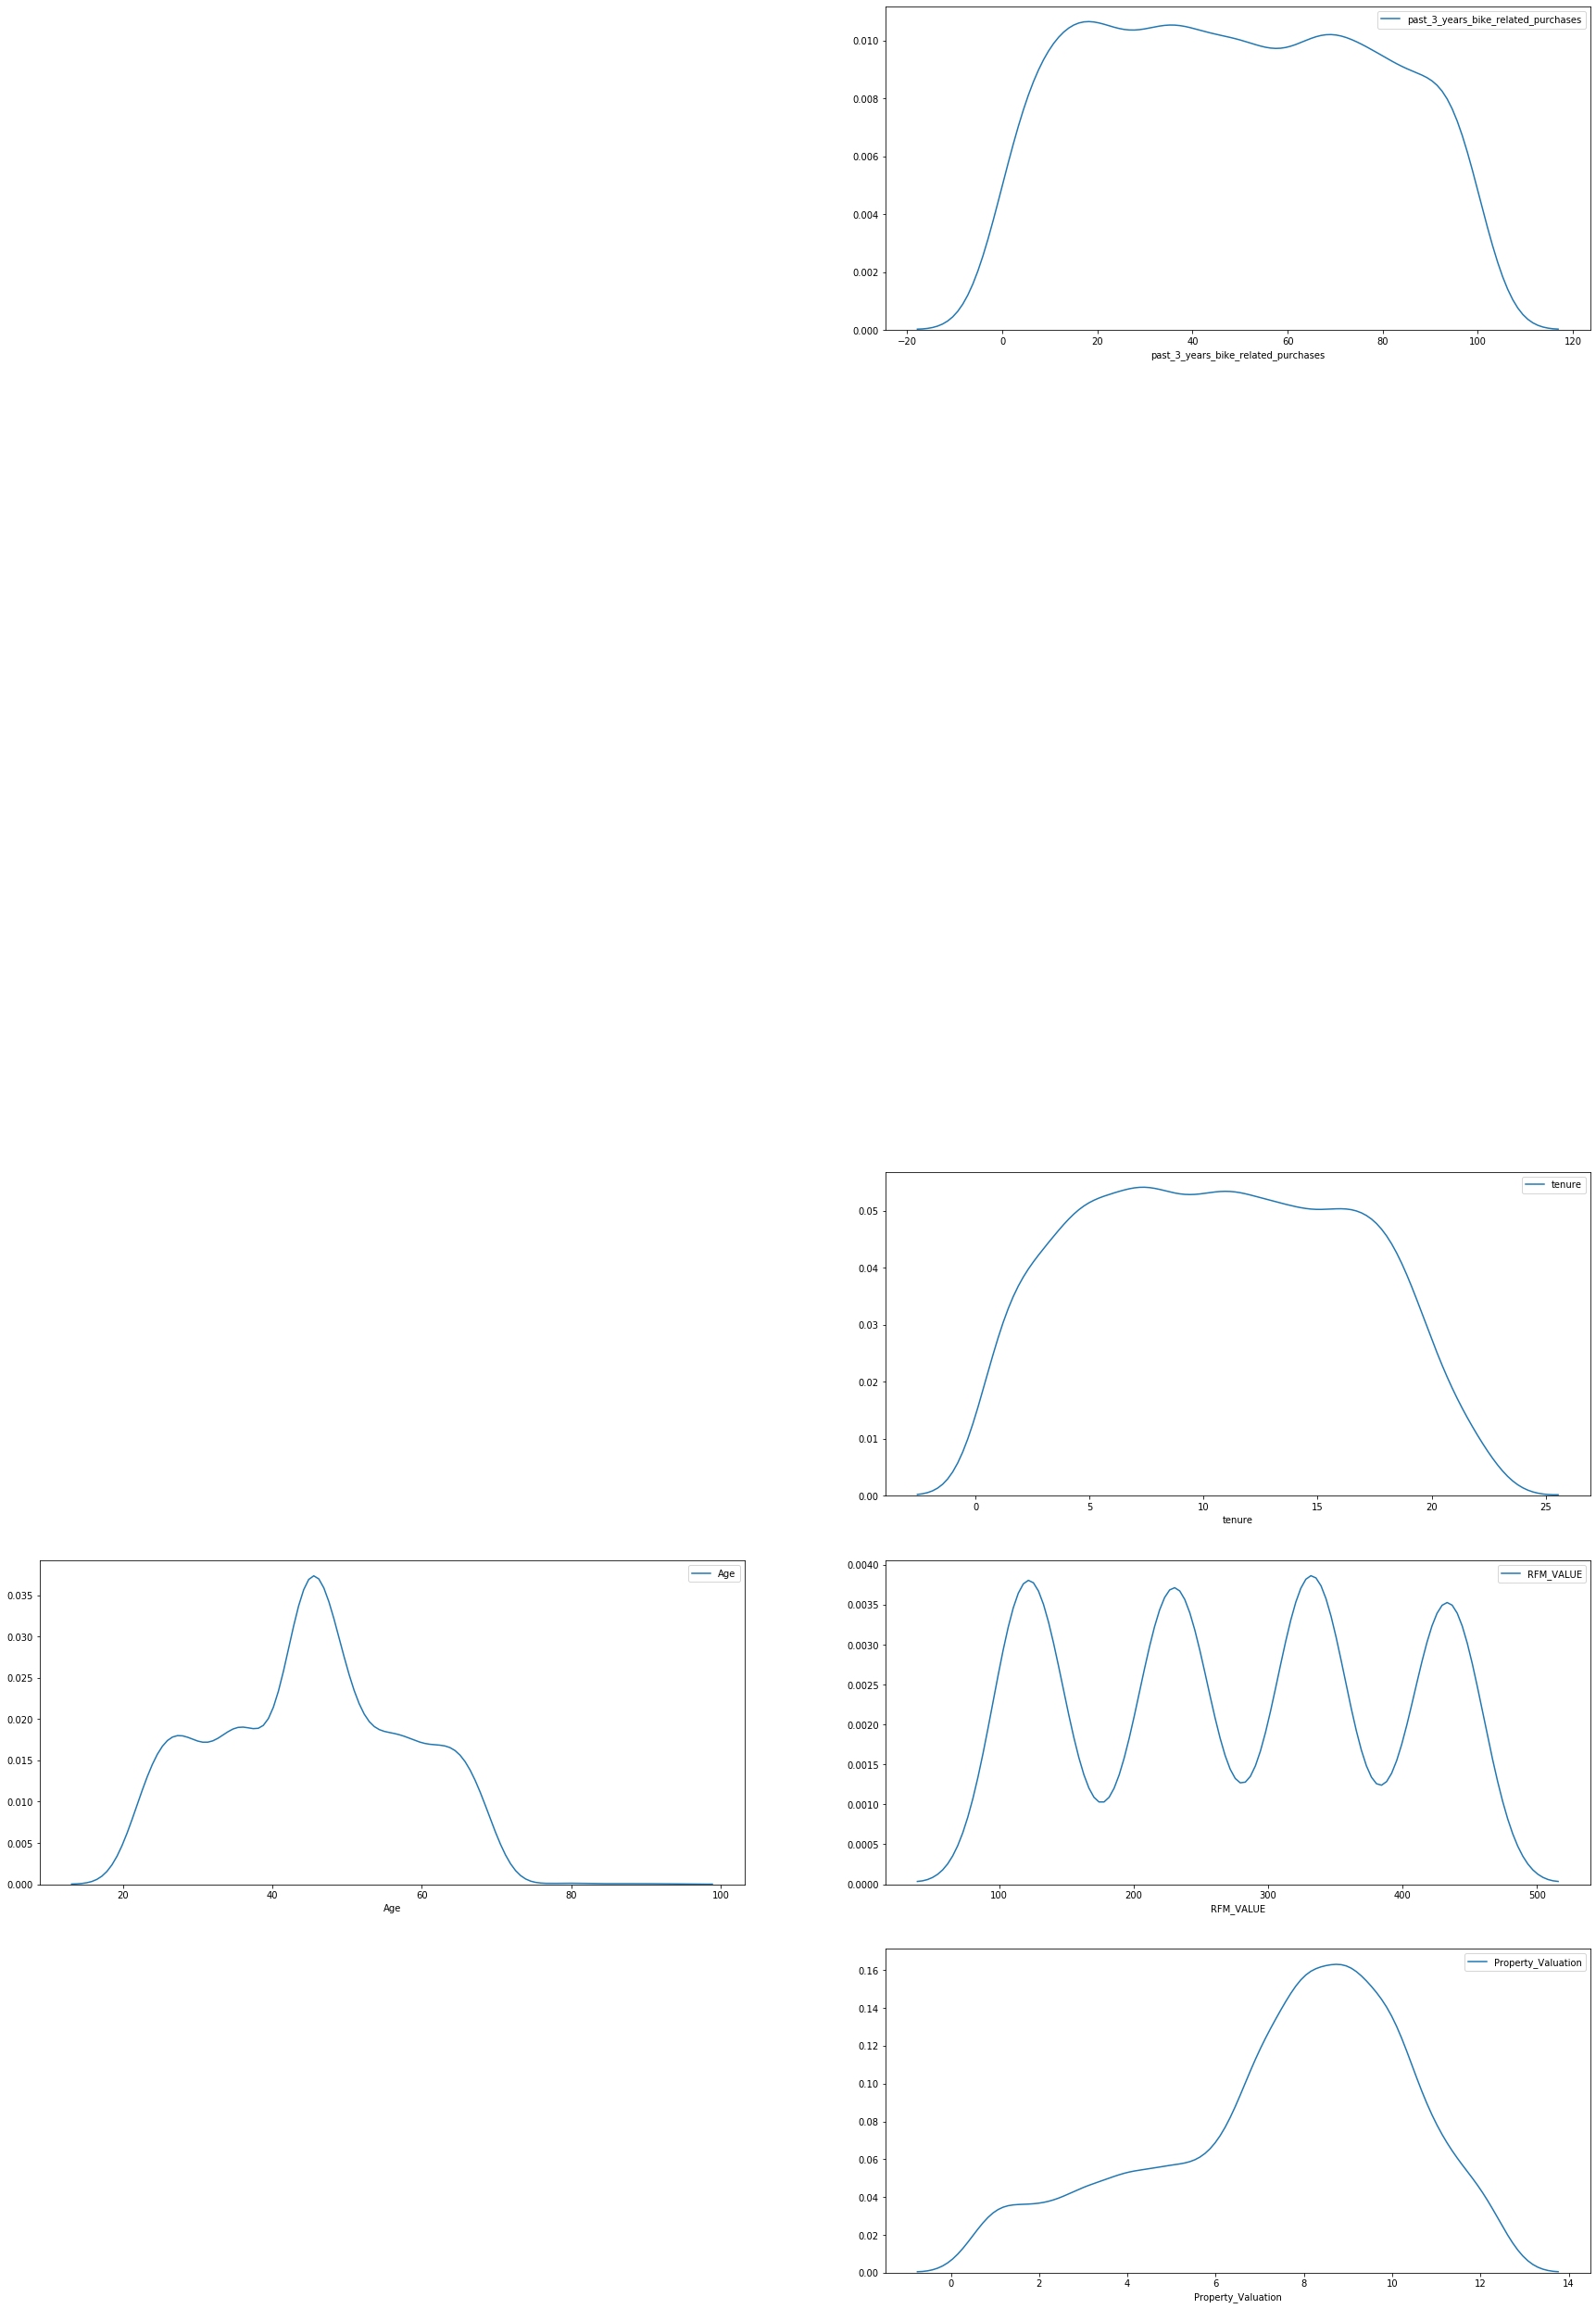

In [22]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax=plt.subplot(6,2,i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

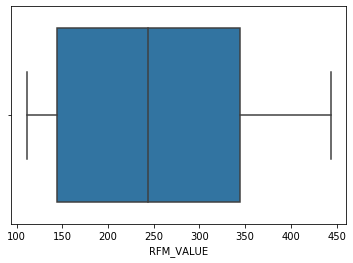

In [23]:
sns.boxplot((df['RFM_VALUE']))

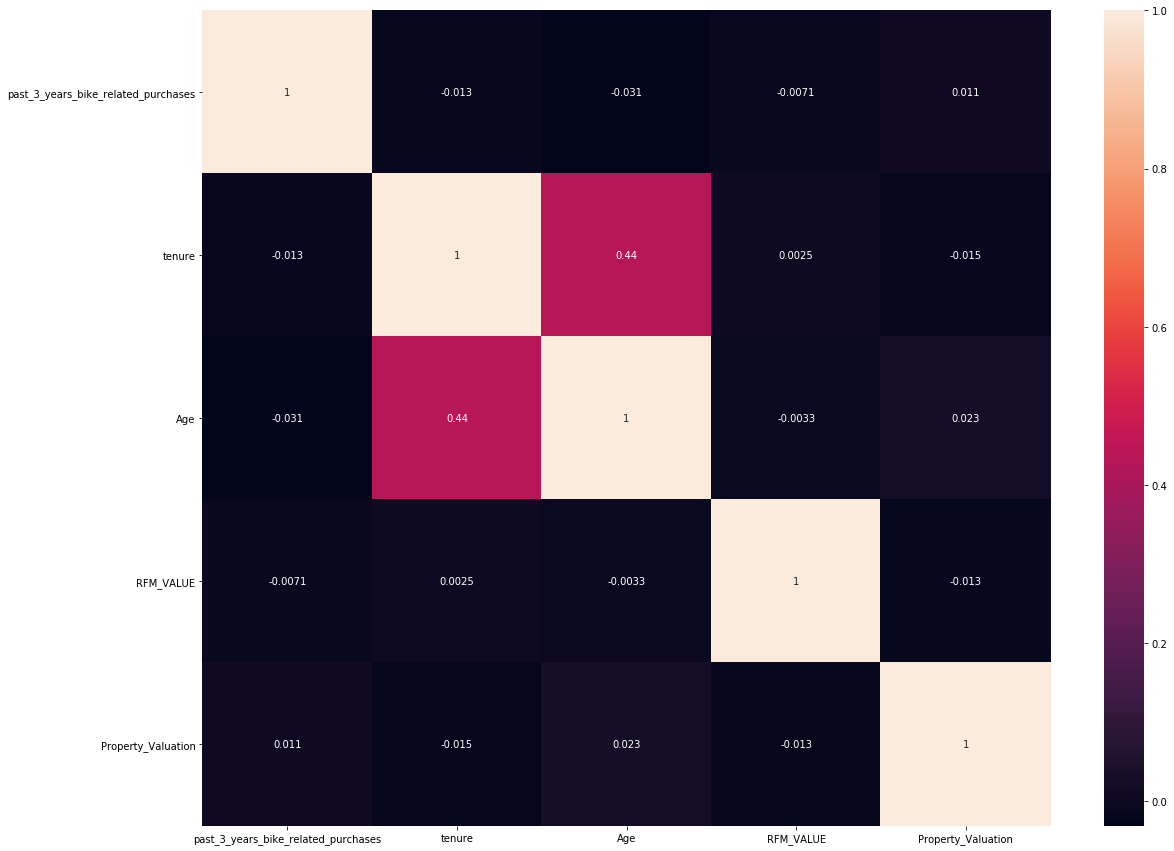

In [24]:
correlation = df.corr()
# Plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
 yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Perform Data Mappng for most categorical variables

In [25]:
df.drop('deceased_indicator',axis=1,inplace=True)

In [26]:
df.describe(include='O')

,gender,job_title,job_industry_category,wealth_segment,owns_car,State
count,3415,3415,3415,3415,3415,3415
unique,2,11,10,3,2,3
top,F,Others,Manufacturing,Mass Customer,Yes,NSW
freq,1759,2681,701,1705,1725,1827


In [27]:
df['wealth_segment']=df['wealth_segment'].map({'Mass Customer': 1, 'High Net Worth': 2, 'Affluent Customer': 3})
df['gender']=df['gender'].map({'M': 1, 'F': 0})
df['State']=df['State'].map({'NSW': 1, 'QLD': 2, 'VIC':3})
df['owns_car']=df['owns_car'].map({'Yes': 1, 'No': 0})

In [28]:
# Calculate the frequency of each job industry
industry_counts = df['job_industry_category'].value_counts()

# Create a mapping dictionary with reversed ranking
industry_mapping = {industry: rank for rank, (industry, _) in enumerate(industry_counts[::-1].items(), start=1)}

# Map the job industries to numerical values and store them in a new column
df['industry_rank'] = df['job_industry_category'].map(industry_mapping)

# Now, the 'industry_rank' column contains numerical values with the highest frequency industry having the highest value


In [29]:
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank
0,1,46,Others,Argiculture,2,0,1,21,324,1,10,2
1,0,67,Others,Health,1,1,1,21,123,1,10,7
2,0,80,Others,Null,3,0,1,21,122,2,3,8
3,1,4,Others,Null,1,1,1,21,124,1,10,8
4,1,78,Null,Manufacturing,3,0,1,21,122,1,11,10


In [30]:
#Creating bins for RFM_VALUE 

# Define the bin edges for the age groups
bins = [100, 200, 300, 400, float('inf')]

# Create a new column 'age_group' with the age bins
df['RFM_VALUE'] = pd.cut(df['RFM_VALUE'], bins=bins, labels=['100-199', '200-299', '300-399', '400-499'])
df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank
0,1,46,Others,Argiculture,2,0,1,21,300-399,1,10,2
1,0,67,Others,Health,1,1,1,21,100-199,1,10,7
2,0,80,Others,Null,3,0,1,21,100-199,2,3,8
3,1,4,Others,Null,1,1,1,21,100-199,1,10,8
4,1,78,Null,Manufacturing,3,0,1,21,100-199,1,11,10


In [31]:
# Define a dictionary for RFM labels to numerical values
RFM_mapping = {'100-199': 1, '200-299': 2, '300-399': 3, '400-499':4}

# Map the age group labels to numerical values
df['RFM_VALUE'] = df['RFM_VALUE'].map(RFM_mapping)

df.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank
0,1,46,Others,Argiculture,2,0,1,21,3,1,10,2
1,0,67,Others,Health,1,1,1,21,1,1,10,7
2,0,80,Others,Null,3,0,1,21,1,2,3,8
3,1,4,Others,Null,1,1,1,21,1,1,10,8
4,1,78,Null,Manufacturing,3,0,1,21,1,1,11,10


In [32]:
df.drop(columns=['job_title','job_industry_category'],axis=1, inplace= True)

In [33]:
df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank
0,1,46,2,0,1,21,3,1,10,2
1,0,67,1,1,1,21,1,1,10,7
2,0,80,3,0,1,21,1,2,3,8
3,1,4,1,1,1,21,1,1,10,8
4,1,78,3,0,1,21,1,1,11,10


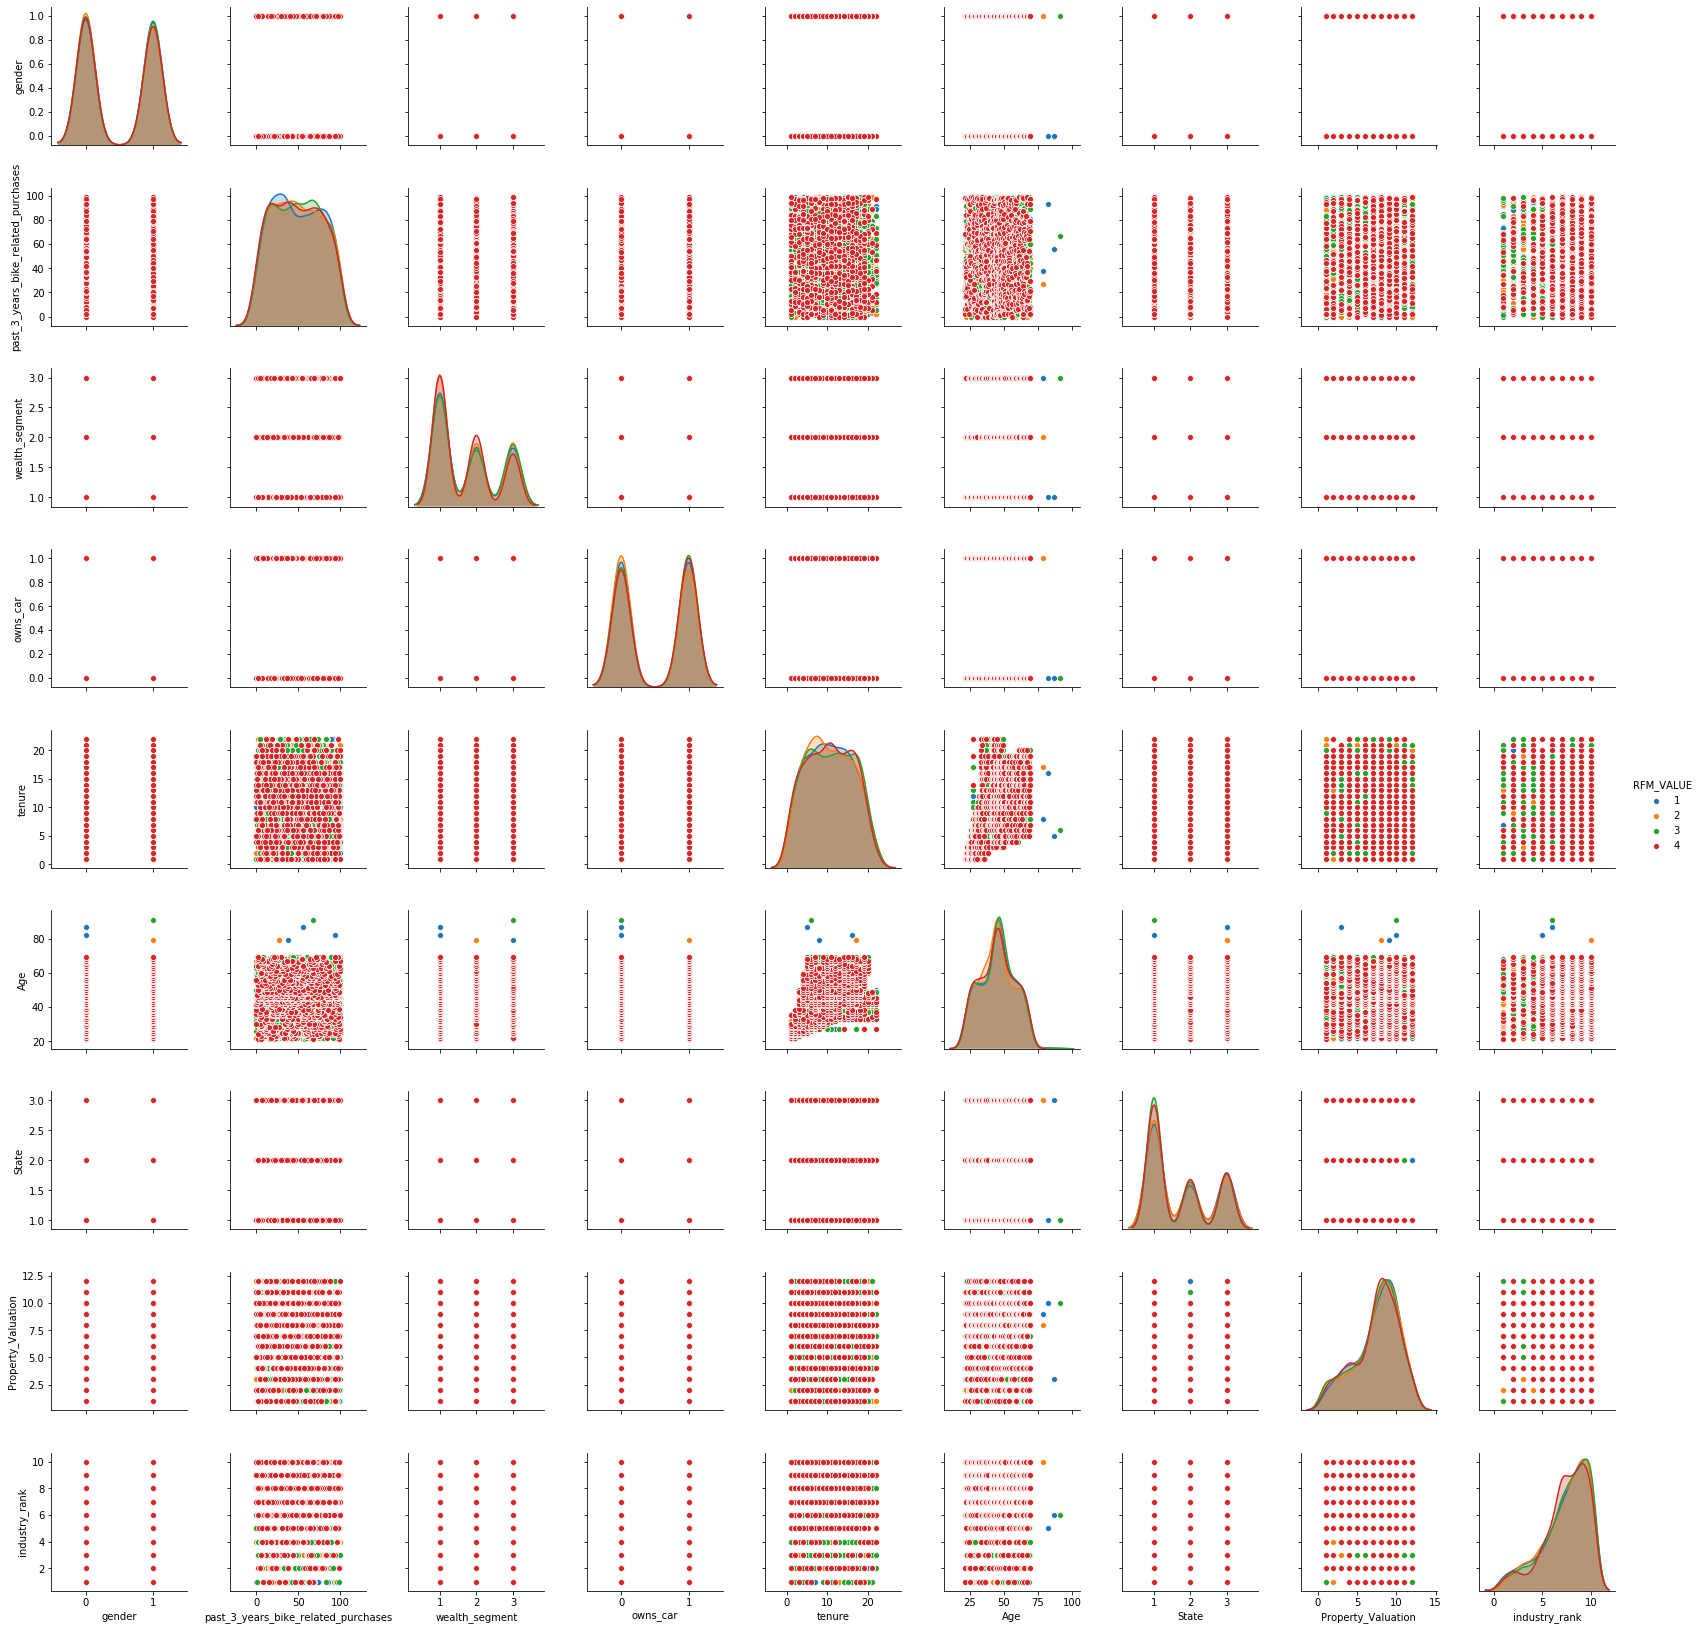

In [34]:
# Create a pairplot without specifying bandwidth manually
sns.pairplot(df, hue='RFM_VALUE', diag_kind='kde')

In [35]:
# Dropping RFM na d perfroming an unsupervised ML model
df1=df.copy()

df1.drop('RFM_VALUE',axis=1, inplace=True)
df1.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,State,Property_Valuation,industry_rank
0,1,46,2,0,1,21,1,10,2
1,0,67,1,1,1,21,1,10,7
2,0,80,3,0,1,21,2,3,8
3,1,4,1,1,1,21,1,10,8
4,1,78,3,0,1,21,1,11,10


In [36]:
scalar=StandardScaler()
df1_scaled = scalar.fit_transform(df1)

In [37]:
# Scaling our features
#scaled_vars = ['past_3_years_bike_related_purchases','Age','tenure','Property_Valuation']
#df1[scaled_vars] = scalar.fit_transform(df1[scaled_vars])
#df1.head()

## K-MEANS CLUSTERING MODEL

### Finding 'K' Value by Elbow Method

In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering

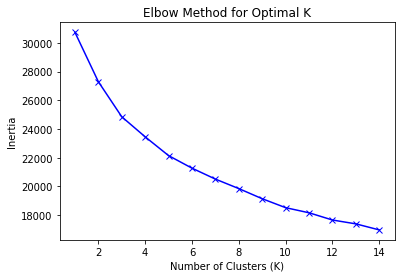

In [40]:
# Assuming you have your data in a DataFrame 'df1' with features for clustering

inertia = []
range_val = range(1, 15)

for k in range_val:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pd.DataFrame(df1_scaled))  # Fit the K-Means model to your data
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [41]:
kmeans_model = KMeans(4)
clusters= kmeans_model.fit_predict(df1)

In [42]:
# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_

# Get the sizes of each cluster
cluster_sizes = pd.Series(clusters).value_counts()

# Explore and analyze each cluster further based on your specific problem and goals


In [43]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df1.columns])
#Inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df1.columns])
cluster_centers

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,State,Property_Valuation,industry_rank
0,0.496094,45.247396,1.756510,0.510417,12.996094,53.729167,1.757812,7.598958,7.475260
1,0.503367,56.612795,1.757576,0.505051,7.479798,32.794613,1.718855,7.372054,7.383838
2,0.461039,15.467532,1.758813,0.502783,10.482375,44.905380,1.700371,7.457328,7.404453
3,0.491282,84.297436,1.714872,0.503590,11.027692,46.476923,1.701538,7.620513,7.490256


In [44]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
0,1,46,2,0,1,21,3,1,10,2,1
1,0,67,1,1,1,21,1,1,10,7,1
2,0,80,3,0,1,21,1,2,3,8,1
3,1,4,1,1,1,21,1,1,10,8,2
4,1,78,3,0,1,21,1,1,11,10,1
...,...,...,...,...,...,...,...,...,...,...,...
3410,1,38,3,1,8,79,1,3,9,10,0
3411,1,27,2,1,17,79,2,3,8,10,0
3412,0,93,1,0,16,82,1,1,10,5,3
3413,0,56,1,0,5,87,1,3,3,6,0


In [45]:
cluster_0_df = cluster_df[cluster_df['Cluster']==0]
cluster_0_df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
730,0,35,1,1,22,34,1,3,8,9,0
777,0,35,2,0,14,35,3,1,7,4,0
778,0,38,3,0,22,35,4,2,6,7,0
785,1,38,1,0,21,35,3,2,9,1,0
853,1,35,1,1,19,36,1,3,8,10,0


In [46]:
cluster_1_df = cluster_df[cluster_df['Cluster']==1]
cluster_1_df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
0,1,46,2,0,1,21,3,1,10,2,1
1,0,67,1,1,1,21,1,1,10,7,1
2,0,80,3,0,1,21,1,2,3,8,1
4,1,78,3,0,1,21,1,1,11,10,1
7,1,58,1,0,1,21,3,3,8,1,1


In [47]:
cluster_2_df = cluster_df[cluster_df['Cluster']==2]
cluster_2_df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
3,1,4,1,1,1,21,1,1,10,8,2
5,0,16,3,0,1,21,3,2,9,6,2
6,1,22,1,0,1,21,4,1,11,6,2
9,0,21,3,0,1,21,1,2,4,4,2
10,0,16,3,1,1,21,1,3,3,7,2


In [48]:
cluster_3_df = cluster_df[cluster_df['Cluster']==3]
cluster_3_df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
11,0,98,1,1,1,21,4,1,10,2,3
31,1,84,2,1,2,22,4,3,8,9,3
47,0,95,2,1,1,22,1,3,9,7,3
53,1,91,1,0,1,22,3,1,9,10,3
55,1,93,1,1,2,22,1,3,6,10,3


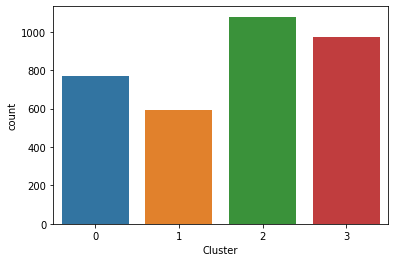

In [49]:
sns.countplot(x='Cluster',data=cluster_df)

In [50]:
new_data = pd.concat([data,cluster_df],axis=1)
new_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,RFM_VALUE,State,Property_Valuation,industry_rank,Cluster
0,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,...,46,2,0,1,21,3,1,10,2,1
1,1888,Sibyl,Scholtz,F,67,2002-01-26,Food Chemist,Health,Mass Customer,N,...,67,1,1,1,21,1,1,10,7,1
2,3435,Stevena,Allcock,F,80,2002-01-15,Senior Editor,Null,Affluent Customer,N,...,80,3,0,1,21,1,2,3,8,1
3,2858,Benedicto,Radki,M,4,2002-01-09,Recruiting Manager,Null,Mass Customer,N,...,4,1,1,1,21,1,1,10,8,2
4,422,Vito,Norker,M,78,2002-01-06,Null,Manufacturing,Affluent Customer,N,...,78,3,0,1,21,1,1,11,10,1


In [51]:
new_data.to_csv('new_data.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'new_data.csv'

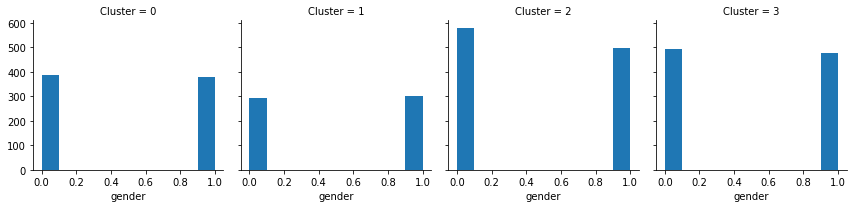

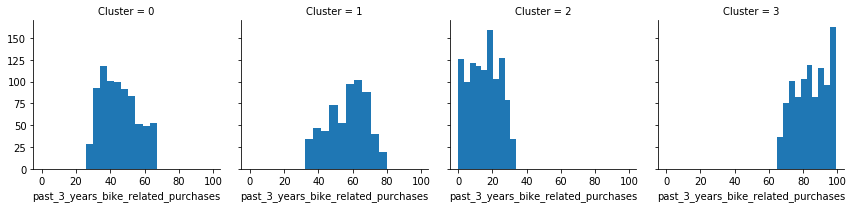

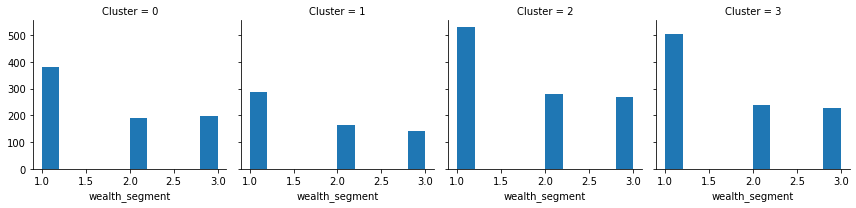

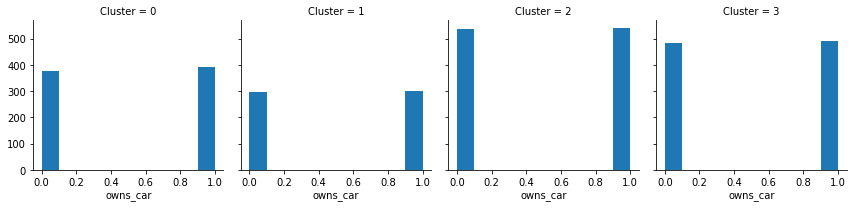

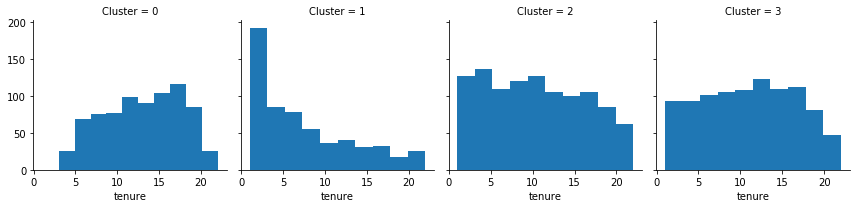

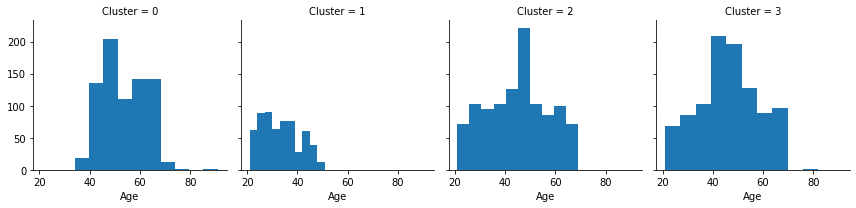

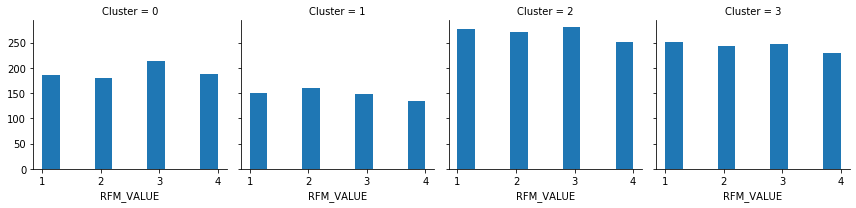

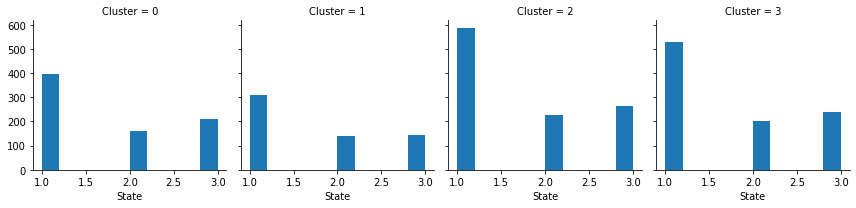

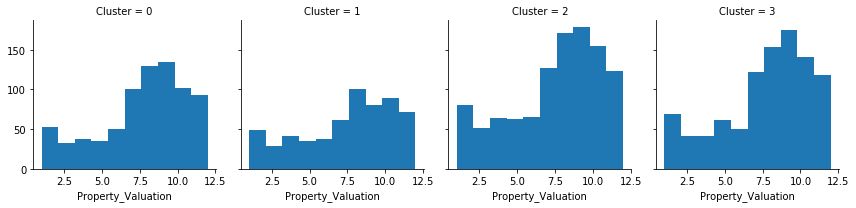

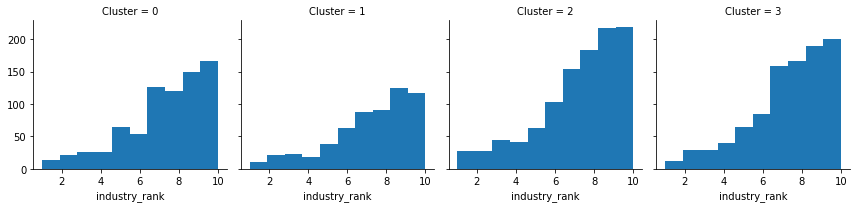

In [52]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid = sns.FacetGrid(cluster_df, col='Cluster')
    grid = grid.map(plt.hist, c)
plt.show()

 Exported data to Excel since I don't have data to show profit or reveneue generated on this table
 and analyzed it to know which clusters are the most profitable.
 Analysis shows Cluster 1 is the most profitable cluster with over --$3.3M-- revenue generated and Cluster 3 with --$3.1M-- revenue generated

 So now going to use random forest to train data and predict the next batch of new data
 and seect customers from just Cluster 1 and cluster 3

In [53]:
cluster_df.drop(('RFM_VALUE'),axis=1, inplace = True)

In [54]:
cluster_df.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,State,Property_Valuation,industry_rank,Cluster
0,1,46,2,0,1,21,1,10,2,1
1,0,67,1,1,1,21,1,10,7,1
2,0,80,3,0,1,21,2,3,8,1
3,1,4,1,1,1,21,1,10,8,2
4,1,78,3,0,1,21,1,11,10,1


In [80]:
### Using RFM as target Variable
df2 = cluster_df.copy()

In [81]:
# Scaling our features
minmax=MinMaxScaler()
scaled_vars = ['past_3_years_bike_related_purchases','Age','tenure','Property_Valuation','industry_rank']
df2[scaled_vars] = minmax.fit_transform(df2[scaled_vars])
df2.head()

,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,Age,State,Property_Valuation,industry_rank,Cluster
0,1,0.464646,2,0,0.0,0.0,1,0.818182,0.111111,1
1,0,0.676768,1,1,0.0,0.0,1,0.818182,0.666667,1
2,0,0.808081,3,0,0.0,0.0,2,0.181818,0.777778,1
3,1,0.040404,1,1,0.0,0.0,1,0.818182,0.777778,2
4,1,0.787879,3,0,0.0,0.0,1,0.909091,1.000000,1


## MODEL SELECTION

In [82]:
# Input features
X = df2.drop('Cluster', axis=1).values 
# Target variable
y = df2['Cluster'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import metrics
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X_test)


# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.977751756440281


In [85]:
#Confusion Matrix
print(metrics.confusion_matrix(y_test,prediction_test))
print(classification_report(y_test,prediction_test))

[[185   5   4   0]
 [  2 150   0   3]
 [  1   1 272   0]
 [  2   1   0 228]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       194
           1       0.96      0.97      0.96       155
           2       0.99      0.99      0.99       274
           3       0.99      0.99      0.99       231

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [61]:
test_data = pd.read_excel('KPMG_Model_Data.xlsx', sheet_name = 'NewCustomerData')
test_data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value
0,Marinna,Kauschke,F,21,1973-03-15,50,Sales Associate,Financial Services,Affluent Customer,N,...,VIC,Australia,3,0.89,1.1125,1.1125,1.1125,231,595,0.775625
1,Olia,O' Mullan,F,77,1973-03-24,50,Account Executive,Health,Mass Customer,N,...,NSW,Australia,7,0.93,0.9300,0.9300,0.7905,88,904,0.500000
2,Brigitte,Whellams,F,67,1973-05-09,50,Payment Adjustment Coordinator,Null,Mass Customer,N,...,NSW,Australia,8,1.08,1.3500,1.3500,1.1475,155,188,1.156250
3,Ivy,Farr,F,56,1973-07-03,50,Office Assistant IV,IT,High Net Worth,N,...,NSW,Australia,11,0.61,0.6100,0.7625,0.7625,242,530,0.828750
4,Beverlee,Ungerechts,F,49,1973-10-03,49,Civil Engineer,Manufacturing,Mass Customer,N,...,QLD,Australia,7,0.51,0.5100,0.5100,0.4335,234,617,0.754375


In [71]:
df3 = test_data.copy()

In [72]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            954 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   Age                                  983 non-null    int64         
 6   job_title                            983 non-null    object        
 7   job_industry_category                983 non-null    object        
 8   wealth_segment                       983 non-null    object        
 9   deceased_indicator                   983 non-null    object        
 10  owns_car      

In [73]:
df3.drop(columns=['first_name', 'last_name','DOB','deceased_indicator','address','postcode','country','job_title',
                         'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20', 'Unnamed: 21', 'Rank', 'Value'], axis=1, inplace=True)
df3.head()

,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,F,21,50,Financial Services,Affluent Customer,Yes,8,VIC,3
1,F,77,50,Health,Mass Customer,No,8,NSW,7
2,F,67,50,Null,Mass Customer,Yes,17,NSW,8
3,F,56,50,IT,High Net Worth,No,19,NSW,11
4,F,49,49,Manufacturing,Mass Customer,No,8,QLD,7


In [74]:
df3['wealth_segment']=df3['wealth_segment'].map({'Mass Customer': 1, 'High Net Worth': 2, 'Affluent Customer': 3})
df3['gender']=df3['gender'].map({'M': 1, 'F': 0})
df3['state']=df3['state'].map({'NSW': 1, 'QLD': 2, 'VIC':3})
df3['owns_car']=df3['owns_car'].map({'Yes': 1, 'No': 0})
df3.head()

,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation
0,0,21,50,Financial Services,3,1,8,3,3
1,0,77,50,Health,1,0,8,1,7
2,0,67,50,Null,1,1,17,1,8
3,0,56,50,IT,2,0,19,1,11
4,0,49,49,Manufacturing,1,0,8,2,7


In [75]:
# Map the job industries to numerical values and store them in a new column
df3['job_industry_rank'] = df3['job_industry_category'].map(industry_mapping)

# Now, the 'industry_rank' column contains numerical values with the highest frequency industry having the highest value


In [76]:
df3.head()

,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,job_industry_rank
0,0,21,50,Financial Services,3,1,8,3,3,9
1,0,77,50,Health,1,0,8,1,7,7
2,0,67,50,Null,1,1,17,1,8,8
3,0,56,50,IT,2,0,19,1,11,4
4,0,49,49,Manufacturing,1,0,8,2,7,10


In [77]:
df3.drop(('job_industry_category'),axis=1,inplace=True)
df3.head()

,gender,past_3_years_bike_related_purchases,Age,wealth_segment,owns_car,tenure,state,property_valuation,job_industry_rank
0,0,21,50,3,1,8,3,3,9
1,0,77,50,1,0,8,1,7,7
2,0,67,50,1,1,17,1,8,8
3,0,56,50,2,0,19,1,11,4
4,0,49,49,1,0,8,2,7,10


In [79]:
scaled_vars = ['past_3_years_bike_related_purchases','Age','tenure','property_valuation','job_industry_rank']
df3[scaled_vars] = minmax.fit_transform(df3[scaled_vars])
df3.head()

,gender,past_3_years_bike_related_purchases,Age,wealth_segment,owns_car,tenure,state,property_valuation,job_industry_rank
0,0,0.212121,0.453125,3,1,0.333333,3,0.181818,0.888889
1,0,0.777778,0.453125,1,0,0.333333,1,0.545455,0.666667
2,0,0.676768,0.453125,1,1,0.761905,1,0.636364,0.777778
3,0,0.565657,0.453125,2,0,0.857143,1,0.909091,0.333333
4,0,0.494949,0.437500,1,0,0.333333,2,0.545455,1.000000


In [86]:
pred_value = rf.predict(df3.values)

In [87]:
pred_value

array([2, 3, 0, 0, 0, 2, 0, 0, 3, 0, 2, 2, 3, 3, 0, 0, 0, 2, 2, 3, 0, 1,
       0, 3, 3, 0, 0, 3, 3, 2, 0, 0, 2, 2, 2, 3, 0, 3, 2, 3, 0, 0, 3, 0,
       0, 0, 2, 2, 2, 0, 0, 3, 1, 2, 2, 0, 3, 2, 0, 3, 0, 1, 0, 2, 0, 3,
       3, 3, 2, 2, 0, 2, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0,
       1, 0, 3, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 0, 3, 0, 3, 3, 2, 2, 2, 2, 0, 3, 0, 0, 0, 3, 3, 2, 3, 2, 0, 0,
       3, 2, 3, 0, 0, 2, 3, 0, 3, 2, 0, 0, 3, 3, 0, 3, 2, 0, 2, 3, 2, 3,
       0, 3, 3, 3, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 2, 2, 3, 0, 3, 2, 2, 0,
       3, 0, 3, 1, 3, 3, 0, 2, 3, 0, 0, 2, 3, 2, 2, 3, 3, 3, 0, 2, 2, 0,
       2, 3, 3, 2, 3, 0, 2, 3, 0, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0, 2, 0, 3,
       0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 2, 3, 3, 3, 2, 3, 0, 0, 3, 0, 2, 2,
       3, 2, 3, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 3, 3, 0, 3, 3, 1, 3, 0, 2,
       2, 3, 0, 3, 0, 0, 2, 3, 0, 2, 2, 0, 1, 0, 2, 3, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 3, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,

In [88]:
pred_value_prob = rf.predict_proba(df3.values)
pred_value_prob

array([[0.025, 0.005, 0.965, 0.005],
       [0.015, 0.14 , 0.005, 0.84 ],
       [0.86 , 0.045, 0.025, 0.07 ],
       ...,
       [0.42 , 0.495, 0.035, 0.05 ],
       [0.095, 0.83 , 0.015, 0.06 ],
       [0.925, 0.06 , 0.   , 0.015]])

In [89]:
# function to select second column for probabilities

def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_value_prob, 1)

[0.005,
 0.14,
 0.045,
 0.19,
 0.41,
 0.0,
 0.195,
 0.07,
 0.04,
 0.005,
 0.0,
 0.0,
 0.005,
 0.02,
 0.04,
 0.29,
 0.17,
 0.01,
 0.005,
 0.01,
 0.01,
 0.76,
 0.095,
 0.085,
 0.025,
 0.185,
 0.15,
 0.005,
 0.08,
 0.01,
 0.27,
 0.005,
 0.0,
 0.0,
 0.0,
 0.06,
 0.17,
 0.05,
 0.01,
 0.005,
 0.255,
 0.12,
 0.01,
 0.17,
 0.125,
 0.19,
 0.0,
 0.01,
 0.0,
 0.135,
 0.02,
 0.09,
 0.76,
 0.0,
 0.005,
 0.005,
 0.005,
 0.005,
 0.195,
 0.405,
 0.245,
 0.635,
 0.095,
 0.005,
 0.345,
 0.02,
 0.01,
 0.025,
 0.005,
 0.015,
 0.18,
 0.0,
 0.02,
 0.015,
 0.265,
 0.045,
 0.015,
 0.005,
 0.02,
 0.175,
 0.0,
 0.14,
 0.02,
 0.08,
 0.01,
 0.08,
 0.325,
 0.195,
 0.575,
 0.235,
 0.025,
 0.02,
 0.015,
 0.135,
 0.065,
 0.355,
 0.19,
 0.93,
 0.8,
 0.015,
 0.02,
 0.24,
 0.025,
 0.03,
 0.005,
 0.005,
 0.0,
 0.005,
 0.0,
 0.075,
 0.005,
 0.16,
 0.155,
 0.015,
 0.01,
 0.095,
 0.005,
 0.0,
 0.015,
 0.0,
 0.225,
 0.015,
 0.015,
 0.0,
 0.015,
 0.01,
 0.195,
 0.005,
 0.005,
 0.015,
 0.085,
 0.02,
 0.02,
 0.005,
 0.005,
 0.0

In [90]:
pred_data = test_data.copy()
pred_data['Cluster'] = pred_value
pred_data['Predictions - Probability'] = column(pred_value_prob, 1)
pred_data.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,...,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Rank,Value,Cluster,Predictions - Probability
0,Marinna,Kauschke,F,21,1973-03-15,50,Sales Associate,Financial Services,Affluent Customer,N,...,3,0.89,1.1125,1.1125,1.1125,231,595,0.775625,2,0.005
1,Olia,O' Mullan,F,77,1973-03-24,50,Account Executive,Health,Mass Customer,N,...,7,0.93,0.9300,0.9300,0.7905,88,904,0.500000,3,0.140
2,Brigitte,Whellams,F,67,1973-05-09,50,Payment Adjustment Coordinator,Null,Mass Customer,N,...,8,1.08,1.3500,1.3500,1.1475,155,188,1.156250,0,0.045
3,Ivy,Farr,F,56,1973-07-03,50,Office Assistant IV,IT,High Net Worth,N,...,11,0.61,0.6100,0.7625,0.7625,242,530,0.828750,0,0.190
4,Beverlee,Ungerechts,F,49,1973-10-03,49,Civil Engineer,Manufacturing,Mass Customer,N,...,7,0.51,0.5100,0.5100,0.4335,234,617,0.754375,0,0.410


In [92]:
pred_data.to_csv("pred_data.csv", index=False)